# STATISTICS FOR ML

### Importing the necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy import stats
import random
import warnings
warnings.filterwarnings(action = 'ignore')

## PART-A ( Concept Based)--25 points

### The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO

In [4]:
a = [57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54]
a_array = np.array(a)
a_df = pd.DataFrame(a , columns = ['Age'])

#### Q1. Compute the mean, median and the mode of the data

In [5]:
a_mean = np.mean(a)
a_median = np.median(a)
a_mode = pd.Series(a).mode()[0]
print('The Mean of the data : ',a_mean)
print('The Median of the data : ',a_median)
print('The Mode of the data :',a_mode)

The Mean of the data :  54.904761904761905
The Median of the data :  55.0
The Mode of the data : 54


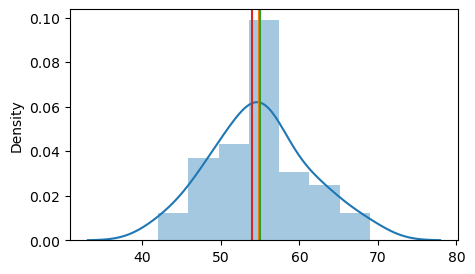

In [6]:
plt.figure(figsize=(5,3))
sns.distplot(a)
plt.axvline(a_mean , color = 'C1')
plt.axvline(a_median , color = 'C2')
plt.axvline(a_mode , color = 'C3')

#### Q2. Compute the range , variance and standard deviation of CEO ages

In [7]:
a_min = min(a)
a_max = max(a)
a_range = a_max - a_min
a_variance = np.var(a)
a_std = np.std(a)
print('The Range is :',a_range)
print('The Variance is :',a_variance)
print('The Standard Deviation :',a_std)

The Range is : 27
The Variance is : 38.51473922902495
The Standard Deviation : 6.2060244302633025


#### Q3. Find the Mean Deviation for the Data . The Mean Deviation is defined as below.

In [8]:
def mean_deviation(x):
    temp = 0
    for i in range(0,len(x)):
        temp+=np.abs(x[i] - a_mean)
    temp = temp/len(a)
    return temp

In [9]:
a_md = mean_deviation(a)
print('The Mean deviation is : ',a_md)

The Mean deviation is :  4.814058956916099


#### Q4. Calculate the Pearson coefficient of skewness and comment on theskewness of the data

In [10]:
def pearsons_cs(x):
    return 3*(np.mean(x) - np.median(x))/np.std(x)

In [11]:
a_pcs = pearsons_cs(a)
print('The Pearson Coefficient of Skewness is :',a_pcs)

The Pearson Coefficient of Skewness is : -0.046038214790295746


#### COMMENTS 
> - The Pearson Coefficient of Skewness indicates that the skewness of the distribution is slightly left skewed

#### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [12]:
def data_values(x,n):
    interval = (np.mean(x) - n*np.std(x) , np.mean(x) + n*np.std(x))
    print('The interval is ',interval)
    val = np.count_nonzero((interval[0] <= x) & (x <= interval[1]))
    print('The number of values within the specified interval is : ',val)
def Chebyshev_theorem(x):
    sd = np.std(x)
    n = int(input('Enter the number of deviations : '))
    ct = (1 - (1/n**2))*100
    print('The Number of values within the specified interval using Chebyshev’s theorem is : ',ct*len(a)/100)

In [13]:
data_values(a,2)

The interval is  (42.4927130442353, 67.31681076528851)
The number of values within the specified interval is :  39


In [14]:
Chebyshev_theorem(a)

Enter the number of deviations : 2
The Number of values within the specified interval using Chebyshev’s theorem is :  31.5


#### INFERENCE
> - By comparing the two outputs , we can conclude that the value obtained using Chebyshev's theorm is not accurate and can be used only to fetch an approximate value of the count of values within the specified standard deviation interval

#### Q6. Find the three quartiles and the interquartile range (IQR)

In [39]:
def iqr(x):
    global Q1,Q2,Q3,Q4,IQR,u_whisker,l_whisker
    Q1 = x.quantile(0.25)
    Q2 = x.quantile(0.50)
    Q3 = x.quantile(0.75)
    Q4 = x.quantile(1)
    IQR = Q3 - Q1
    u_whisker = Q3 + 1.5*IQR
    l_whisker = Q1 - 1.5*IQR
    
    

In [40]:
iqr(a_df['Age'])
print('The three quartiles and iqr are as follows  ')
print('The first quartile is : ',Q1)
print('The two quartile is : ',Q2)
print('The third quartile is : ',Q3)
print('The Inter Quartile Range is : ',IQR)

The three quartiles and iqr are as follows  
The first quartile is :  51.0
The two quartile is :  55.0
The third quartile is :  57.75
The Inter Quartile Range is :  6.75


#### Q7. Are there any outliers in the data set ? 

In [17]:
print('The Upper Whisker and Lower Whisker are ',l_whisker,' and ',u_whisker,'\n')
print(list(a_df[(a_df['Age'] < l_whisker) | (a_df['Age'] > u_whisker )]['Age'].values),'are the outliers')

The Upper Whisker and Lower Whisker are  40.875  and  67.875 

[68, 69] are the outliers


#### Q8. Draw a boxplot of the dataset to confirm .

From the boxplot we can confirm that our data set contains outliers


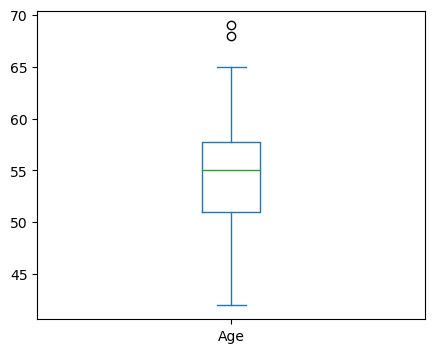

In [18]:
print('From the boxplot we can confirm that our data set contains outliers')
plt.figure(figsize=(5,4))
a_df['Age'].plot(kind = 'box')
plt.show()

#### Q9. Find the percentile rank of the datapoint 50

In [19]:
a_df['PCT'] = a_df['Age'].rank(pct=True)*100
a_df[a_df['Age'] == 50]

,Age,PCT
12,50,22.619048
20,50,22.619048


#### 10. What is the probability that a person becoming a CEO is below 50 yearsof age ?

In [20]:
z50 = (50 - a_mean)/a_std
q10 = stats.norm.cdf(z50)
print('The probability that a person becoming a CEO is below 50 yearsof age is :',q10)

The probability that a person becoming a CEO is below 50 yearsof age is : 0.2146696702826586


#### Q11. Create a frequency distribution for the data and visualize it appropriately

<AxesSubplot:>

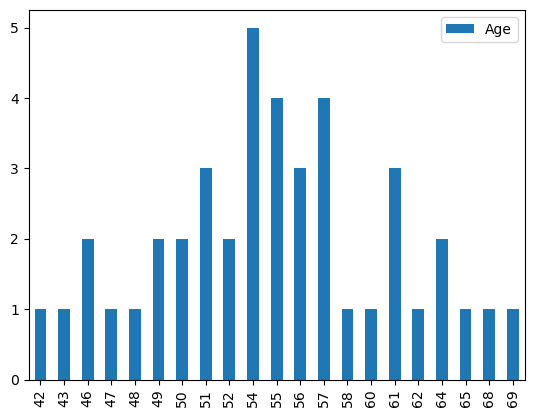

In [21]:
a_df['Age'].value_counts().sort_index().to_frame().plot(kind = 'bar')

#### Q12. Create a probability distribution of the data and visualize it appropriately

<AxesSubplot:>

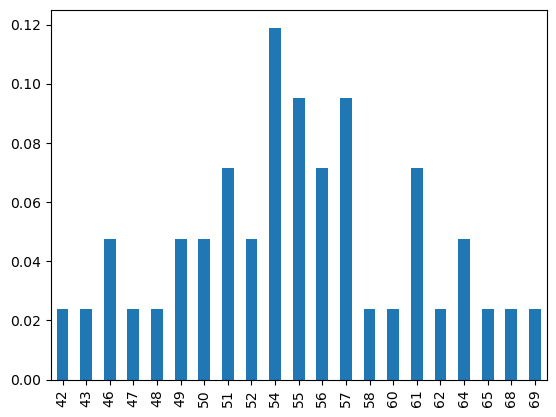

In [22]:
a_df['Age'].value_counts(normalize=True).sort_index().plot(kind = 'bar')

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution ofthe mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?


In [23]:
sample_mean = []
for sample_size in (5,10,15,20,25,30): 
    random.seed(sample_size)
    for i in range (100):
        rand_samp = random.choices(population = a , k = sample_size)
        sample_mean.append(np.mean(rand_samp))
    print('The mean of sample means for sample size',sample_size,' are : ',np.mean(sample_mean))
print('Mean of population is : ',a_mean)

The mean of sample means for sample size 5  are :  54.888000000000005
The mean of sample means for sample size 10  are :  54.88399999999999
The mean of sample means for sample size 15  are :  54.913111111111114
The mean of sample means for sample size 20  are :  54.92145833333334
The mean of sample means for sample size 25  are :  54.937486666666665
The mean of sample means for sample size 30  are :  54.93957222222222
Mean of population is :  54.904761904761905


#### Q14. Treat this dataset as a binomial distribution where p is the probability that a person becomes a CEO above 50 years age. What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years of age?

In [24]:
#Treating it as a Binomial Distribution
x = 6
n = 10
p = len(a_array[a_array > 50])/len(a_array)
q14 = stats.binom.pmf(x , n , p)
print('the probability that exactly 6 are above 50 years of age is :',q14)

the probability that exactly 6 are above 50 years of age is : 0.13201590604140495


#### Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age. 
#### [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]


In [25]:
p = 25/100
x = 75
n = 300
q15 = stats.binom.pmf(x , n , p)
print('The probability that exactly 75 CEOs will be above 50 years of age is : ',q15)

The probability that exactly 75 CEOs will be above 50 years of age is :  0.0531283151571921


#### Q16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [26]:
confidence = 0.95
q16 = stats.norm.interval(confidence = confidence , loc = a_mean , scale = a_std/(len(a))**0.5)
print('Confidence Interval for the true mean age of the population is : ',q16[0],'and',q16[1])
print('\n We use Z Distribution since the sample size is greater than 30')

Confidence Interval for the true mean age of the population is :  53.02788008884848 and 56.78164372067533

 We use Z Distribution since the sample size is greater than 30


#### Q17. A data scientist wants to estimate with 95% confidence the proportion of CEOs of Fortune 500 companies are above 60 years in the population. Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [27]:
alpha  = 0.05
Margin_of_error = 0.02
p = 0.25
Z_alpha_by_2 = stats.norm.isf(alpha/2)
n =  (Z_alpha_by_2**2) * p * (1-p) / (Margin_of_error**2) 
print('The Minimum Sample Size required is : ',n)

The Minimum Sample Size required is :  1800.683822200372


#### Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary

In [28]:
alpha = 0.1
Margin_of_error = 0.05
p = 0.25
Z_alpha_by_2 = stats.norm.isf(alpha/2)
n = (Z_alpha_by_2**2) * p * (1-p) / (Margin_of_error**2)
print('The Minimum Sample Size required is : ',n)

The Minimum Sample Size required is :  202.91575905715607


#### Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his claim with an alpha = 0.05 if out of a random sample of 30 CEOs only10 are above 60 years.


In [29]:
p0 = 0.25
x= 10
n = 30
p1 = x/n
alpha = 0.05


In [30]:
def z_test():
    print('Zstat is :',Zstat)
    print('Zcritical is :',Zcritical,'\n')
    if Zstat > Zcritical:
        print('Reject Null Hypothesis')
    else:
        print('Failed to Reject Null Hypothesis')
def p_test():
    print('The P Value is :',p_value,'\n')
    if p_value < alpha:
        print('Reject Null Hypothesis')
    else:
        print('Failed to reject Null Hypothesis')

In [31]:
Zstat = (p1 - p0)/((p0*(1-p0))/n)**0.5
Zcritical = stats.norm.isf(alpha/2)
z_test()

Zstat is : 1.0540925533894596
Zcritical is : 1.9599639845400545 

Failed to Reject Null Hypothesis


In [32]:
p_value = 2*stats.norm.sf(Zstat)
p_test()

The P Value is : 0.29184054514378865 

Failed to reject Null Hypothesis


#### Q20. Assume you are a data scientist for the Fortune 500 companies. You areasked to research the question whether the CEO ages of UK are on average older than the CEO ages of Americans. you take a random sample of 40 CEO ages from America and UK and the data is as follows:

In [33]:
UK_1 = '47 49 73 50 65 70 49 47 40 43 46 35 38 40 47 39 49 37 37 36 40 37 31 48 48 45 52 38 38 36 44 40 48 45 45 36 39 44 52 47'
UK_2  = UK_1.split(' ')
UK = []
for i in UK_2:
    UK.append(int(i))
USA_1 = '47 57 52 47 48 56 56 52 50 40 46 43 44 51 36 42 49 49 40 43 39 39 22 41 45 46 39 32 36 32 32 32 37 33 44 49 44 44 49 32'
USA_2 = USA_1.split(' ')
USA =[]
for j in USA_2:
    USA.append(int(j))
print(UK,'\n','Number of Data points is : ',len(UK),'\n')
print(USA,'\n','Number of Data points is : ',len(USA),'\n')

[47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47] 
 Number of Data points is :  40 

[47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32] 
 Number of Data points is :  40 



#### a. What are your hypotheses?

#### b. What significance level will you use?

#### c. What statistical test will you use?

In [34]:
# The data scientist will use an independent samples t-test to determine 
# whether the mean age of CEOs in UK is greater than the mean age of CEOs in America.
# This test is used to compare the means of two independent groups and
# is appropriate when the sample size is small and the population standard deviation is unknown.


from scipy.stats import ttest_ind
from statistics import mean, sqrt
UK_data = [47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47]
USA_data = [47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32]
t_stat, p_val = ttest_ind(UK_data, USA_data)
print(t_stat)
print(p_val)

x1 = mean(UK_data)
x2 = mean(USA_data)


1.0018742016808726
0.3195023563852081


#### d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [35]:
# Assuming that 
s1 = 8.8  
s2 = 7.8 # we can use the following steps to perform the t-test:

# Calculate the sample means:
x1 = mean(UK_data)
x2 = mean(USA_data)

n1 = len(UK_data)
n2 = len(USA_data)

#Calculate the pooled standard deviation:
s = sqrt(((n1-1) * s1**2 + (n2-1) * s2**2) / (n1 + n2 - 2))

#Calculate the t-statistic:
t = (x1 - x2) / (s * sqrt(1/n1 + 1/n2))

In [36]:
#Find the p-value using the t-distribution:
from scipy.stats import t

n1 = len(UK_data)
n2 = len(USA_data)
df = n1 + n2 - 2
p_value = (1 - t.cdf(t, df)) * 2

TypeError: unsupported operand type(s) for -: 't_gen' and 'int'

#### e. What is your decision?

In [ ]:
# The decision is based on the p-value obtained from the t-test.
# If the p-value is less than the significance level (alpha),
# we reject the null hypothesis 

#### f. What can you conclude?

In [ ]:
#conclude that there is not enough evidence to suggest that the mean age of CEOs in UK is greater than the mean age of CEOs in America.


#### g. Do you feel that using the data given really answers the original question asked?

In [ ]:
#Using the data given may not fully answer the original question asked because
# it is a sample of data and not a complete representation of the population of all CEO ages of Fortune 500 companies
# in the UK and USA.
# The sample data may not be representative of the population or may not have enough power to detect a difference if one exists.

#### h. What other data might be used to answer the question?

# EDA 

#### Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Import the dataset and view the first 10 rows of it.


In [ ]:
df = pd.read_csv(r"C:\Users\NIMAL\Desktop\Python\GL DSE OCT22'\Mini Project\3 EDA & STATS\Project 2\creditcard.csv")
df.head(10)

#### 2. Display shape/dimension of the dataset.

In [ ]:
print('The shape of the data is ',df.shape)
print('The dimension of the data is ',df.ndim)

#### 3. Check for the missing values. Display number of missing values per column.

In [ ]:
df.isnull().sum().head(5)

#### 4. Check the datatype, number of non-null values and name of each variable in the dataset.

In [ ]:
df.info()

#### 5. Check if there are any non-real characters in the dataset.


#### 6. Check the descriptive statistics of the dataset.

In [ ]:
df.describe()

#### 7. Check the number of fraudulent transactions in the dataset and visualize using pie chart and bar plot.


In [ ]:
df['Class'].value_counts()

In [ ]:
plt.title('Type of Transaction')
plt.pie(x = df['Class'].value_counts() , autopct='%.2f%%' , labels=['Legit','Fraud'] , explode = [0,0.9])

plt.show()

#### 8. Check the maximum and minimum fraudulent amount.

In [ ]:
fraud_maxamount = df[df['Class'] == 1]['Amount'].max()
fraud_minamount = df[df['Class'] == 1]['Amount'].min()
print('The Maximum Fraudulent Amount is : ',fraud_maxamount)
print('The Minimun Fraudulent Amount is : ',fraud_minamount)

#### 9. Check the number of transactions where the transaction amount is zeroand consider as a fraud transaction.

In [ ]:
No_of_0_FTrans = df[(df['Class'] == 1) & (df['Amount'] == 0)][['Class','Amount']].value_counts().values[0]
print('The number of transactions where the transaction amount is zero and consider as a fraud transaction is :',No_of_0_FTrans)

#### 10. Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed.

In [ ]:
cols = df.columns
li=[]
sk_di = {}
for i in cols:
    print('Column Name :',i)
    skewness = df[i].skew()
    sk_di[i] = skewness
    print('The skewness of ',i,'is :',skewness)
    if (skewness<0.09) & (skewness>-0.09):
        li.append(i)
print(li)
for j in li:
    print('The Plot for the ',j)
    df[j].plot(kind = 'kde')
    plt.show()

#### 11. List down columns that are highly skewed.

In [ ]:
sk = pd.DataFrame(sk_di)
for i in sk.columns:
    if sk[i] > 1:
        print('The columns ',i,'are extremely skewed on the positive side')
    elif sk[i]<1:
        print('The Column',i,'are extremely skewed on the negative side')
    else:
        print('Normal')

In [ ]:
sk['Time']